In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

Define  true purchase rates

In [8]:
true_purchase_rate = [0.0001, 0.05, 0.02, 0.01, 0.01, 0.001]

Define an EmailStrategy class corresponding to five different emailing strategies

In [9]:
class EmailStrategy:
  def __init__(self, r):
    self.r = r
    self.a = 1.0
    self.b = 1.0
  
  def update(self, x):
    self.a += x
    self.b += 1. - x

In [10]:
def plot(strategies, trial):
  '''Plots the posterior Beta distributions'''
  for strategy in strategies:
    pdf = beta.pdf(np.linspace(0, 0.1, 100), strategy.a, strategy.b)
    plt.plot(np.linspace(0, 0.1, 100), pdf, label=f"true rate: {strategy.r:.4f}")
  plt.title(f"Posterior distributions of purchase rates after sending {trial+1} emails")
  plt.legend()
  plt.show()

In [11]:
def experiment():
  '''Runs an experiment that chooses the best strategy for sending out 5000 emails'''
  strategies = [EmailStrategy(r) for r in true_purchase_rate]
  num_sent_emails = 5000
  realized_purchase_rate = []
    
  for i in range(num_sent_emails):

    j = np.argmax([np.random.beta(strategy.a, strategy.b) for strategy in strategies])
    
    if np.random.random() < strategies[j].r:
      realized_purchase_rate.append(1.0)
      strategies[j].update(1.0)
    else:
      realized_purchase_rate.append(0.0)
      strategies[j].update(0.0)

    if i in [1999, num_sent_emails-1]:
      plot(strategies, i)

  avg_purchase_rate = sum(realized_purchase_rate)/len(realized_purchase_rate)
  return avg_purchase_rate

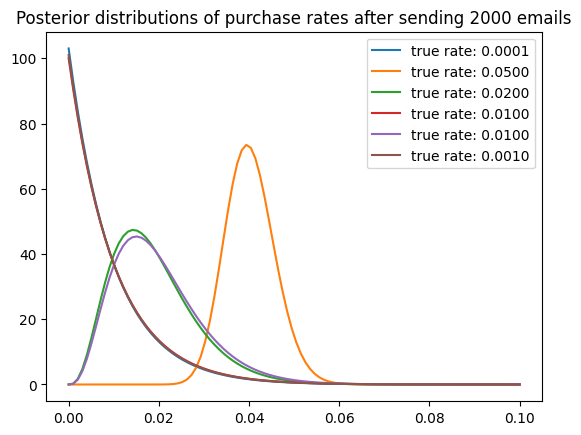

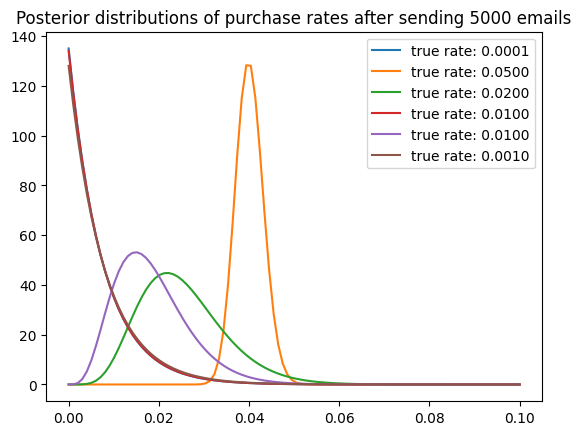

Average purchase rate during the experiment is:  0.0344


In [12]:
if __name__ == "__main__":
  avg_purchase_rate = experiment()
  print(f"Average purchase rate during the experiment is: ", avg_purchase_rate)